In [30]:
import torch
import numpy as np
from transformers import AutoProcessor

from datasets import load_dataset, Features, Sequence, ClassLabel, Value, Array2D, Array3D
import evaluate

### Prepare dataset

In [2]:
dataset = load_dataset("sizhkhy/passports")
examples_train = dataset["train"]
examples_eval = dataset["valid"]

In [3]:
def flatten(lists):
    return [y for x in lists for y in x]

id2label = {i:v for i, v in set(list(zip(flatten(examples_train["labels"]), flatten(examples_train["label_string"]))))}
label2id = {v:i for i, v in id2label.items()}

In [4]:
examples_train.column_names

['image', 'label_string', 'words', 'labels', 'boxes']

In [5]:
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

def prepare_examples(examples):
    images = examples['image']
    words = examples['words']
    boxes = examples['boxes']
    word_labels = examples['labels']
    encoding = processor(
        images,
        words,
        boxes=boxes,
        word_labels=word_labels,
        # return_tensors="pt",
        padding="max_length",
        # max_length=512,
        truncation=True,
    )
    return encoding

In [6]:
train_dataset = examples_train.map(
    prepare_examples, 
    batched=True,
    remove_columns=examples_train.column_names
)

eval_dataset = examples_eval.map(
    prepare_examples, 
    batched=True,
    remove_columns=examples_eval.column_names
)

In [7]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

"<s> BELGIE BELGIQUE BELGIEN BELGIUM Type / Type Typ / Type Land van algete / Pays érinttour Ausstellungsland / issuing country Paspoortiummer / N' du passsport Pass Nur Pasaport no EH100396 P 1.Naam / Noms Name / Surname BEL SPECIMEN 2. Vocmaman / Prénoms Vornamen / Given names BARBARA 3. Nationastell / Nationalité Staatsangehörigkeit / Nanonatry BELG 4. Geboortedatum / Date de naissance 6. Geboorteplaats/ Lieu de naissance Geburtsdatum / Date of birth Geburtsort I Place of birth LILLE 06 11 99 B. Geslacht / Seve Gegrzyecht / Sex V-F 7. Datum van afgifte / Dabe de délivrance Ausstellungsdatum / Date of issue 04 06 08 # Geldig tout / Date d'expiration Gullig bis / Dato of expiry 03 06 13 Behörde / Authority UTOPIA to: Handtekening van de houder Signature du titulaire Unterschrift des Passinhabers Holder's signattire perimen P<BELSPECIMEN << BARBARA <<<<<<<<<<<<<<<<<<<<<< EH100396<4BEL9911064F1306031 <<<<<<<<<<<<<< 00</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

In [8]:
train_dataset.set_format("torch")

In [9]:
example = train_dataset[0]
for k, v in example.items():
    print(k, v)

labels tensor([-100,    5, -100, -100,    5, -100, -100, -100,    5, -100, -100,    5,
        -100, -100,    5,    5,    5,    5,    5,    5,    5,    5,    5, -100,
        -100,    5,    5, -100,    5, -100, -100, -100,    5, -100, -100, -100,
        -100, -100,    5,    5,    5,    5, -100, -100, -100, -100,    5,    5,
        -100,    5,    5, -100, -100,    5,    5,    5, -100, -100,    5,   11,
        -100, -100, -100,    5,    5, -100, -100, -100,    5,    5, -100,    5,
           5,    5, -100, -100,    5,    2, -100, -100,    5, -100,    5, -100,
        -100,    5,    5, -100, -100,    5, -100, -100,    5,    5,    5,   13,
        -100, -100,    5, -100,    5, -100, -100,    5,    5, -100,    5, -100,
        -100, -100, -100, -100, -100, -100,    5,    5, -100, -100, -100,    5,
        -100,    5, -100,    5, -100, -100, -100, -100,    5,    5,    5,    5,
        -100,    5, -100,    5, -100, -100, -100, -100, -100, -100, -100, -100,
           5, -100,    5,    5, -

In [10]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
    print(processor.tokenizer.decode(id), label.item())

<s> -100
 BEL 5
G -100
IE -100
 BEL 5
GI -100
Q -100
UE -100
 BEL 5
GI -100
EN -100
 BEL 5
GI -100
UM -100
 Type 5
 / 5
 Type 5
 Typ 5
 / 5
 Type 5
 Land 5
 van 5
 al 5
get -100
e -100
 / 5
 P 5
ays -100
 é 5
rint -100
t -100
our -100
 Aus 5
st -100
ell -100
ung -100
s -100
land -100
 / 5
 issuing 5
 country 5
 P 5
asp -100
o -100
ortium -100
mer -100
 / 5
 N 5
' -100
 du 5
 pass 5
s -100
port -100
 Pass 5
 Nur 5
 Pas 5
ap -100
ort -100
 no 5
 E 11
H -100
100 -100
396 -100
 P 5
 1 5
. -100
Na -100
am -100
 / 5
 N 5
oms -100
 Name 5
 / 5
 S 5
urn -100
ame -100
 BEL 5
 SPEC 2
IM -100
EN -100
 2 5
. -100
 Voc 5
m -100
aman -100
 / 5
 Pr 5
én -100
oms -100
 V 5
orn -100
amen -100
 / 5
 Given 5
 names 5
 BAR 13
B -100
ARA -100
 3 5
. -100
 Nation 5
ast -100
ell -100
 / 5
 National 5
ité -100
 Sta 5
ats -100
ange -100
h -100
ö -100
rig -100
ke -100
it -100
 / 5
 Nan 5
on -100
at -100
ry -100
 BEL 5
G -100
 4 5
. -100
 G 5
eb -100
o -100
orted -100
atum -100
 / 5
 Date 5
 de 5
 na 5
issance -

### Metrics

In [11]:
metric = evaluate.load("seqeval")

In [32]:
return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [id2label[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2label[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

### Model

In [33]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained(
    "microsoft/layoutlmv3-base", 
    id2label=id2label,
    label2id=label2id
)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./test",
    max_steps=1000,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=1e-5,
    eval_strategy="steps",
    eval_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

In [35]:
from transformers.data.data_collator import default_data_collator

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics
)

max_steps is given, it will override any value given in num_train_epochs


### Train

In [36]:
trainer.train()

  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\junwa\anaconda3\envs\wise\Lib\site-packages\transformers\modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\junwa\anaconda3\envs\wise\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.4732014238834381, 'eval_precision': 0.14583333333333334, 'eval_recall': 0.1111111111111111, 'eval_f1': 0.12612612612612614, 'eval_accuracy': 0.8735224586288416, 'eval_runtime': 2.6918, 'eval_samples_per_second': 3.343, 'eval_steps_per_second': 1.857, 'epoch': 2.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.3073630630970001, 'eval_precision': 0.3287671232876712, 'eval_recall': 0.38095238095238093, 'eval_f1': 0.35294117647058826, 'eval_accuracy': 0.9243498817966903, 'eval_runtime': 2.5508, 'eval_samples_per_second': 3.528, 'eval_steps_per_second': 1.96, 'epoch': 4.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.22280269861221313, 'eval_precision': 0.4583333333333333, 'eval_recall': 0.5238095238095238, 'eval_f1': 0.4888888888888889, 'eval_accuracy': 0.950354609929078, 'eval_runtime': 2.683, 'eval_samples_per_second': 3.354, 'eval_steps_per_second': 1.864, 'epoch': 6.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.16266614198684692, 'eval_precision': 0.5616438356164384, 'eval_recall': 0.6507936507936508, 'eval_f1': 0.6029411764705883, 'eval_accuracy': 0.9633569739952719, 'eval_runtime': 2.6984, 'eval_samples_per_second': 3.335, 'eval_steps_per_second': 1.853, 'epoch': 8.0}
{'loss': 0.302, 'grad_norm': 1.8882520198822021, 'learning_rate': 5e-06, 'epoch': 10.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.12085269391536713, 'eval_precision': 0.7384615384615385, 'eval_recall': 0.7619047619047619, 'eval_f1': 0.75, 'eval_accuracy': 0.9787234042553191, 'eval_runtime': 2.7123, 'eval_samples_per_second': 3.318, 'eval_steps_per_second': 1.843, 'epoch': 10.0}


c:\Users\junwa\anaconda3\envs\wise\Lib\site-packages\transformers\modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.12393239140510559, 'eval_precision': 0.6617647058823529, 'eval_recall': 0.7142857142857143, 'eval_f1': 0.6870229007633588, 'eval_accuracy': 0.9692671394799054, 'eval_runtime': 2.6355, 'eval_samples_per_second': 3.415, 'eval_steps_per_second': 1.897, 'epoch': 12.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.12492009252309799, 'eval_precision': 0.819672131147541, 'eval_recall': 0.7936507936507936, 'eval_f1': 0.8064516129032259, 'eval_accuracy': 0.9787234042553191, 'eval_runtime': 2.75, 'eval_samples_per_second': 3.273, 'eval_steps_per_second': 1.818, 'epoch': 14.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.09741049259901047, 'eval_precision': 0.7575757575757576, 'eval_recall': 0.7936507936507936, 'eval_f1': 0.7751937984496123, 'eval_accuracy': 0.9787234042553191, 'eval_runtime': 2.712, 'eval_samples_per_second': 3.319, 'eval_steps_per_second': 1.844, 'epoch': 16.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.10345828533172607, 'eval_precision': 0.7936507936507936, 'eval_recall': 0.7936507936507936, 'eval_f1': 0.7936507936507936, 'eval_accuracy': 0.9810874704491725, 'eval_runtime': 2.5972, 'eval_samples_per_second': 3.465, 'eval_steps_per_second': 1.925, 'epoch': 18.0}
{'loss': 0.0403, 'grad_norm': 0.21430332958698273, 'learning_rate': 0.0, 'epoch': 20.0}


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.10525424778461456, 'eval_precision': 0.8225806451612904, 'eval_recall': 0.8095238095238095, 'eval_f1': 0.8160000000000001, 'eval_accuracy': 0.9822695035460993, 'eval_runtime': 2.6935, 'eval_samples_per_second': 3.341, 'eval_steps_per_second': 1.856, 'epoch': 20.0}
{'train_runtime': 1386.9536, 'train_samples_per_second': 1.442, 'train_steps_per_second': 0.721, 'train_loss': 0.1711606044769287, 'epoch': 20.0}


TrainOutput(global_step=1000, training_loss=0.1711606044769287, metrics={'train_runtime': 1386.9536, 'train_samples_per_second': 1.442, 'train_steps_per_second': 0.721, 'total_flos': 530877081600000.0, 'train_loss': 0.1711606044769287, 'epoch': 20.0})

### Evaluate

In [37]:
trainer.evaluate()

c:\Users\junwa\anaconda3\envs\wise\Lib\site-packages\transformers\modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/5 [00:00<?, ?it/s]

{'eval_loss': 0.10525424778461456,
 'eval_precision': 0.8225806451612904,
 'eval_recall': 0.8095238095238095,
 'eval_f1': 0.8160000000000001,
 'eval_accuracy': 0.9822695035460993,
 'eval_runtime': 2.8039,
 'eval_samples_per_second': 3.21,
 'eval_steps_per_second': 1.783,
 'epoch': 20.0}

### Inference

In [92]:
import time
start_time = time.time()

idx = 0
example = examples_eval[idx]
print(example.keys())

dict_keys(['image', 'label_string', 'words', 'labels', 'boxes'])


In [93]:
image = example["image"]
words = example["words"]
boxes = example["boxes"]
word_labels = example["labels"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt").to("cuda")
for k, v in encoding.items():
    print(k, v.shape)

input_ids torch.Size([1, 304])
attention_mask torch.Size([1, 304])
bbox torch.Size([1, 304, 4])
labels torch.Size([1, 304])
pixel_values torch.Size([1, 3, 224, 224])


In [94]:
with torch.no_grad():
  outputs = model(**encoding)

In [95]:
logits = outputs.logits
logits.shape

torch.Size([1, 304, 15])

In [96]:
import torch.nn.functional as F
confs = F.softmax(logits, dim=-1).squeeze().tolist()

In [97]:
predictions = logits.argmax(-1).squeeze().tolist()
confs = [li[p] for (li,p) in zip(confs, predictions)]

In [98]:
labels = encoding.labels.squeeze().tolist()

end_time = time.time()
inference_time = end_time - start_time
print(f"Inference time: {inference_time} seconds")

Inference time: 0.5045785903930664 seconds


In [99]:
def unnormalize_box(bbox, width, height):
      return [
          width * (bbox[0] / 1000),
          height * (bbox[1] / 1000),
          width * (bbox[2] / 1000),
          height * (bbox[3] / 1000),
      ]
token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

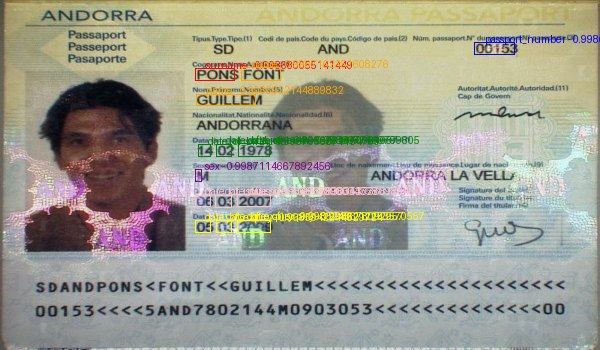

In [100]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {'passport_number':'blue', 'date_of_birth':'green', 'name':'orange', 'fathers_name':'violet', 'surname': 'red','other':'black', 'sex':'purple', 'date_of_expiry': 'yellow', 'date_of_issue': 'pink'}

for prediction, box, conf in zip(true_predictions, true_boxes, confs):
    predicted_label = iob_to_label(prediction).lower()
    if predicted_label != 'other':
      draw.rectangle(box, outline=label2color[predicted_label])
      draw.text((box[0] + 10, box[1] - 10), text=f'{predicted_label} - {conf}', fill=label2color[predicted_label], font=font)

image